<a href="https://colab.research.google.com/github/Chylaieva/projekt_zaliczeniowy_oleksandra_chylaieva_2/blob/main/projekt_zaliczeniowy_oleksandra_chylaieva_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Projekt zaliczeniowy na podstawie danych z serwisu Twitter (X)

Plik którego dotyczy dana praca to Dane4.csv.

Każdy wiersz reprezentuje pojedynczy tweet wraz z informacjami o jego treści, dacie publikacji, użytkowniku, liczbie polubień, retweetów oraz dodatkowych metadanych, takich jak linki, multimedia czy oznaczenia wrażliwości treści.

W danych znajdują się m.in. następujące typy informacji:

- treść tweetów (kolumna text),

- data utworzenia tweeta (created_at),

- data utworzenia konta użytkownika (user_created_at),

- liczba polubień i retweetów,

- informacje o użytkowniku (followers, weryfikacja konta),

- linki do tweetów, linki zewnętrzne oraz obrazki,

- informacje językowe, które mogą zostać wykorzystane w analizie NLP.

### Import bibliotek i wczytanie danych

Najpierw importuję biblioteki, które będą potrzebne:

- pandas – do pracy z tabelami

- re – do wyszukiwania linków w tekście

- matplotlib – do wykresów

- nltk – do stopwords

- spacy – do NLP (rozpoznawanie osób, miejsc, organizacji)

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

### Wczytanie danych z pliku CSV

Na początku wczytuję plik dane4.csv do programu.

In [ ]:
df = pd.read_csv("/content/dane4.csv")

Sprawdzam pierwsze 5 wierszy danych, żeby zobaczyć, czy wszystko się dobrze wczytało.

In [ ]:
df.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Mon Nov 28 16:30:02 +0000 2022,NaN,NaN,NaN,9,1597266579062149122,matipniewski,1.597230e+18,1.401581e+18,...,2,8,0,sraka,sraka,ko_smaty,244,NaN,http://sraka.com,False
1,NaN,Mon Nov 28 20:35:39 +0000 2022,NaN,NaN,NaN,35,1597328388636938241,NaN,NaN,NaN,...,8186,589,162,Polska,PrawyPopulista 🇵🇱🇺🇦,PrawaStronaa,80738,NaN,NaN,False
2,NaN,Mon Nov 28 16:41:28 +0000 2022,NaN,NaN,NaN,0,1597269455020883968,mharger20,1.597269e+18,8.360090e+17,...,102,622,0,NaN,Harger do 047,mharger20,5690,NaN,http://Twich.tv/mharger20,False
3,NaN,Mon Nov 28 19:35:31 +0000 2022,NaN,NaN,NaN,0,1597313255554572289,MussaBabaleo2,1.597312e+18,1.464325e+18,...,281,920,0,Tanzania,Waltz,WaMpembee,1242,NaN,NaN,False
4,NaN,Mon Nov 28 13:24:52 +0000 2022,NaN,NaN,NaN,1,1597219976712433665,elonmusk,1.597171e+18,4.419640e+07,...,34,239,0,NaN,Mark Damasco,realMarkDamasco,875,NaN,NaN,False


Sprawdzam nazwy kolumn, bo będę ich używała w dalszej części projektu.
Wyświetlam je, ponieważ chce mieć szybki dostęp.

In [ ]:
df.columns

Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'quote_id', 'retweet_count', 'retweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_id', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')

### CZĘŚĆ 1

### 1.Zamieniam skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia)


W kolumnie created_at jest data utworzenia tweeta.
Najpierw muszę zamienić ją na typ daty, żeby Python ją rozumiał.
Potem wyciągam z niej dzień tygodnia.
Na końcu tłumaczę nazwy dni z angielskiego na polski.

In [ ]:
df["created_at"] = pd.to_datetime(
    df["created_at"],
    format="mixed", #format="mixed" → pandas radzi sobie z różnymi formatami dat
    errors="coerce" #errors="coerce" → jeśli coś się nie da zamienić, to daje NaT zamiast błędu
)

Podczas zamiany kolumny na typ daty pojawiło się ostrzeżenie,
ponieważ pandas próbował sam odgadnąć format daty.
Aby tego uniknąć, podaję format daty ręcznie.

In [ ]:
df["day_of_week"] = df["created_at"].dt.day_name()

In [ ]:
dni = {
    "Monday": "Poniedziałek",
    "Tuesday": "Wtorek",
    "Wednesday": "Środa",
    "Thursday": "Czwartek",
    "Friday": "Piątek",
    "Saturday": "Sobota",
    "Sunday": "Niedziela"
}

df["day_of_week_pl"] = df["day_of_week"].map(dni)


### 2.Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06)

Teraz zajmuję się kolumną user_created_at.
Jest tam data utworzenia konta użytkownika.
Zamieniam ją na datę i wyciągam miesiąc jako liczbę.

In [ ]:
df["user_created_at"] = pd.to_datetime(
    df["user_created_at"],
    format="mixed", #format="mixed" → pandas radzi sobie z różnymi formatami dat
    errors="coerce" #errors="coerce" → jeśli coś się nie da zamienić, to daje NaT zamiast błędu
)

In [ ]:
df["user_created_month"] = df["user_created_at"].dt.month

### 3.Pobieram wszystkie linki do tweetów

Nie do każdego tweetu są linki więc:

- jeżeli link istnieje w kolumnie tweet_url, to go używam

- jeżeli linku nie ma (wartość pusta), to tworzę go na podstawie
  nazwy użytkownika i id tweeta

In [ ]:
tweet_links = []

Teraz przechodzę po wszystkich wierszach danych.
Dla każdego tweeta sprawdzam, czy link już istnieje.

Jeśli tak – dodaję go do listy.

Jeśli nie – tworzę link ręcznie.

In [ ]:
for index, row in df.iterrows():

    if pd.notna(row["tweet_url"]):
        tweet_links.append(row["tweet_url"])

    else:
        link = f"https://twitter.com/{row['user_screen_name']}/status/{row['id']}"
        tweet_links.append(link)

Na koniec sprawdzam kilka pierwszych linków,
żeby upewnić się, że wszystko działa poprawnie.

In [ ]:
tweet_links[:5]

['https://twitter.com/ko_smaty/status/1597266579062149122',
 'https://twitter.com/PrawaStronaa/status/1597328388636938241',
 'https://twitter.com/mharger20/status/1597269455020883968',
 'https://twitter.com/WaMpembee/status/1597313255554572289',
 'https://twitter.com/realMarkDamasco/status/1597219976712433665']

## 4.Pobram linki z treści tweetów

W treści tweetów znajdują się linki.
Szukam ich za pomocą wyrażeń regularnych (regex).

In [ ]:
text_links = []

In [ ]:
for text in df["text"].dropna():
    found = re.findall(r'https?://\S+', text)
    for link in found:
        text_links.append(link)

### 5.Pobranie linków do obrazków

Pobieram linki do obrazków z kolumny media.

In [ ]:
image_links = []

In [ ]:
for text in df["text"].dropna():
    found = re.findall(r'https?://\S+\.jpg|https?://\S+\.png', text)
    for img in found:
        image_links.append(img)

### 6.Usunięcie stopwords z tekstu

Stopwords to słowa, które nic nie wnoszą do analizy (np. "i", "oraz").
Usuwam je z tekstu tweetów i przekazuje oczyszczony tekst do nowej kolumny.

Podczas próby użycia biblioteki nltk pojawił się błąd, ponieważ nltk
nie posiada pełnej listy stopwords w języku polskim w tym środowisku.

Żeby projekt działał poprawnie, tworzę własną listę najczęstszych
polskich stopwordsów.

In [ ]:
stop_words = {
    "i", "oraz", "a", "ale", "że", "to", "jest", "w", "na", "z", "do", "o",
    "się", "nie", "być", "jak", "dla", "po", "od", "za", "u", "pod", "nad",
    "czy", "tego", "ten", "ta", "to", "te", "tam", "tu"
}

Teraz tworzę funkcję, która usuwa stopwords z tekstu.

In [ ]:
def remove_stopwords(text):
    if pd.isna(text):
        return ""

    words = text.split()
    cleaned_words = []

    for word in words:
        if word.lower() not in stop_words:
            cleaned_words.append(word)

    return " ".join(cleaned_words)

Na końcu stosuję funkcję do całej kolumny text i zapisuję wynik
w nowej kolumnie text_without_stopwords.

In [ ]:
df["text_without_stopwords"] = df["text"].apply(remove_stopwords)

### CZĘŚĆ 2

### 1.Top 5 tweetów z największą liczbą polubień

Sortuję dane malejąco według liczby polubień i biorę pierwsze 5 wierszy.

In [ ]:
df.sort_values("favorite_count", ascending=False).head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,day_of_week,day_of_week_pl,user_created_month,text_without_stopwords
648,NaN,2022-11-21 11:06:57+00:00,NaN,NaN,NaN,7680,1594648556874641408,NaN,NaN,NaN,...,Magdalena W.,MagdalenaW_,7160,NaN,NaN,False,Monday,Poniedziałek,9,...Elon Musk zmienił przycisk Twitter Like ❤️ 💙
57,NaN,2022-11-28 12:39:29+00:00,NaN,https://twitter.com/musicnewsfactpl/status/159...,NaN,1442,1597208558852255744,NaN,NaN,NaN,...,MNFPL,musicnewsfactpl,20569,NaN,NaN,False,Monday,Poniedziałek,8,Elon Musk pracuje zwiększeniem limitu znaków t...
309,NaN,2022-11-25 07:51:09+00:00,NaN,NaN,NaN,961,1596048833766572032,NaN,NaN,NaN,...,Osiem Gwiazd,RuchOsmiuGwiazd,18732,NaN,https://www.facebook.com/OsiemGwiazd2.0,False,Friday,Piątek,4,Elon Musk przywróci konta Alexa Jonesa (foliar...
294,NaN,2022-11-24 22:20:40+00:00,NaN,NaN,NaN,440,1595905264599064576,NaN,NaN,NaN,...,Seb Ross 🇵🇱🇬🇧,SebRoss4,18616,NaN,NaN,False,Thursday,Czwartek,8,Podobno Elon Musk eliminuje wszystkie pedofils...
457,NaN,2022-11-23 14:36:43+00:00,NaN,NaN,https://twitter.com/elonmusk/status/1595250835...,182,1595426122904338434,NaN,NaN,NaN,...,Krzysztof Bosak 🇵🇱,krzysztofbosak,124829,NaN,NaN,True,Wednesday,Środa,10,Elon Musk szafie siedzibie twittera znalazł ko...


### 2.Top 5 tweetów z największą liczbą retweetów

Sortuję dane malejąco według liczby retweetów i biorę pierwsze 5 wierszy.

In [ ]:
df.sort_values("retweet_count", ascending=False).head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,day_of_week,day_of_week_pl,user_created_month,text_without_stopwords
309,NaN,2022-11-25 07:51:09+00:00,NaN,NaN,NaN,961,1596048833766572032,NaN,NaN,NaN,...,Osiem Gwiazd,RuchOsmiuGwiazd,18732,NaN,https://www.facebook.com/OsiemGwiazd2.0,False,Friday,Piątek,4,Elon Musk przywróci konta Alexa Jonesa (foliar...
55,NaN,2022-11-29 00:32:08+00:00,NaN,NaN,https://www.tysol.pl/a95446-opinia-publiczna-z...,40,1597387900202942464,NaN,NaN,NaN,...,Janko Walski,WalskiJ,178586,NaN,http://naszeblogi.pl/blog/214,False,Tuesday,Wtorek,2,"""Dokumenty Twittera dotyczące tłumienia wolnoś..."
57,NaN,2022-11-28 12:39:29+00:00,NaN,https://twitter.com/musicnewsfactpl/status/159...,NaN,1442,1597208558852255744,NaN,NaN,NaN,...,MNFPL,musicnewsfactpl,20569,NaN,NaN,False,Monday,Poniedziałek,8,Elon Musk pracuje zwiększeniem limitu znaków t...
47,NaN,2022-11-29 00:29:29+00:00,NaN,NaN,https://www.tysol.pl/a95446-opinia-publiczna-z...,84,1597387234877267969,NaN,NaN,NaN,...,Pan Cezary Krysztopa #BabiesLivesMatter,cezarykrysztopa,334863,NaN,http://www.tysol.pl,False,Tuesday,Wtorek,7,"""Opinia publiczna zasługuje żeby wiedzieć co w..."
236,NaN,2022-11-25 21:18:04+00:00,NaN,NaN,https://www.ft.com/content/f9fdace4-5eb2-4db2-...,134,1596251897920475137,NaN,NaN,NaN,...,Adam Gwiazda,delestoile,53952,NaN,NaN,False,Friday,Piątek,6,👏 Elon Musk rozpędził cztery wiatry europejski...


### 3.Tweety, które nie są wrażliwe

In [ ]:
df[df["possibly_sensitive"] == False]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_time_zone,user_urls,user_verified,day_of_week,day_of_week_pl,user_created_month,persons,places,organizations,text_without_stopwords
5,NaN,2022-11-28 18:28:16+00:00,NaN,NaN,https://cyberfeed.pl/elon-musk-sugeruje-ze-app...,0,1597296329838845952,NaN,NaN,NaN,...,NaN,https://www.cyberfeed.pl/,False,Monday,Poniedziałek,10,"[słowa po tym, jak „w, większości przestał, Tw...",[],[Apple],"Elon Musk sugeruje, Apple nienawidzi wolności ..."
6,NaN,2022-11-28 22:01:04+00:00,NaN,NaN,https://kresy.pl/?p=853255,6,1597349884230860802,NaN,NaN,NaN,...,NaN,http://www.kresy.pl,False,Monday,Poniedziałek,10,"[Elon Musk, Twittera]",[],"[Apple, sklepie z aplikacjami, Muska, Apple]",Elon Musk oskarżył firmę Apple grożenie zablok...
14,NaN,2022-11-28 19:44:03+00:00,NaN,https://twitter.com/CommonSensePL/status/15973...,NaN,34,1597315402542956544,NaN,NaN,NaN,...,NaN,http://www.futbol24.com,False,Monday,Poniedziałek,2,"[Elon Musk vs, Jak, Komu]",[],[Apple],Elon Musk vs Apple! obstawiacie? Komu kibicuje...
17,NaN,2022-11-28 19:31:32+00:00,NaN,NaN,https://www.pb.pl/musk-apple-w-wiekszosci-prze...,1,1597312254919467010,NaN,NaN,NaN,...,NaN,http://www.pb.pl,True,Monday,Poniedziałek,3,[Elon Musk],[],"[Apple, Twitterze]","Elon Musk przekazał, Apple ograniczyło swoje r..."
19,NaN,2022-11-28 16:35:11+00:00,NaN,NaN,https://twitter.com/Casimiro/status/1597267714...,14,1597267874766258180,NaN,NaN,NaN,...,NaN,https://medium.com/raijuu,False,Monday,Poniedziałek,5,[],[],[PAU NO CU DO ELON],PAU NO CU ELON MUSK https://t.co/MUpIHeQxiz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,NaN,2022-11-20 20:39:17+00:00,NaN,NaN,https://life.fakty.com.ua/ua/tekhnolohii/ilon-...,1,1594430200774893569,NaN,NaN,NaN,...,NaN,NaN,False,Sunday,Niedziela,5,"[Elon Musk może zostać pozbawiony, w stanach, ...",[USA],[Twitterze],Elon Musk może zostać pozbawiony obywatelstwa ...
695,NaN,2022-11-20 22:00:01+00:00,ElonMusk twitter,NaN,https://naekranie.pl/lekkie/twitter-kto-odszed...,1,1594450518553739264,NaN,NaN,NaN,...,NaN,http://www.naEKRANIE.pl,False,Sunday,Niedziela,9,"[Kto, swoje konto]",[],[],Wkrótce przejęciu platformy przez #ElonMusk ce...
697,NaN,2022-11-20 16:14:44+00:00,NaN,NaN,https://twitter.com/everything20233/status/159...,8,1594363622515408901,NaN,NaN,NaN,...,NaN,NaN,False,Sunday,Niedziela,8,"[ja udostępniam, Elon Musk]","[Konfederacji, komunisto]",[],"ja udostępniam, tylko Twitter. Elon Musk należ..."
698,NaN,2022-11-20 17:46:46+00:00,NaN,NaN,https://www.cnn.com/2022/11/20/tech/twitter-el...,3,1594386785869893633,NaN,NaN,NaN,...,NaN,NaN,False,Sunday,Niedziela,12,[],"[Twittera, zablokowanego, Trumpa]","[Trump, CNN]",E. Musk może pogrążyć Twittera jeszcze większy...


### 4.Tweety użytkownika z najstarszym kontem

In [ ]:
oldest_user = df.sort_values("user_created_at").iloc[0]["user_id"]

In [ ]:
df[df["user_id"] == oldest_user]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,day_of_week,day_of_week_pl,user_created_month,text_without_stopwords
255,NaN,2022-11-26 08:51:58+00:00,NaN,NaN,https://fortune.com/2022/11/24/elon-musk-sacks...,5,1596426525439664128,NaN,NaN,NaN,...,𝗦𝘁𝗮𝗻𝗶𝘀ł𝗮𝘄 𝗠. 𝗦𝘁𝗮𝗻𝘂𝗰𝗵 🇵🇱,dziennikarz,39164,NaN,http://www.dziennikarz.pl,True,Saturday,Sobota,3,"Ciekawy tekst tym co Unia Europejska zrobi, ty..."


### 5.Tweety użytkownika z największą liczbą followersów

In [ ]:
top_user = df.sort_values("user_followers_count", ascending=False).iloc[0]["user_id"]

In [ ]:
df[df["user_id"] == top_user]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,day_of_week,day_of_week_pl,user_created_month,text_without_stopwords
261,NaN,2022-11-26 08:09:38+00:00,NaN,NaN,https://tvn24.pl/swiat/usa-elon-musk-zapowiedz...,15,1596415870611472385,NaN,NaN,NaN,...,tvn24,tvn24,370661,NaN,http://www.tvn24.pl,True,Saturday,Sobota,4,"Miliarder Elon Musk zadeklarował piątek, kogo ..."
506,NaN,2022-11-22 09:56:36+00:00,NaN,NaN,https://tvn24.pl/swiat/usa-alex-jones-wroci-na...,7,1594993241010581504,NaN,NaN,NaN,...,tvn24,tvn24,370661,NaN,http://www.tvn24.pl,True,Tuesday,Wtorek,4,Elon Musk wykluczył powrót Alexa Jonesa Twitte...


### 6.Zweryfikowani użytkownicy

In [ ]:
df[df["user_verified"] == True]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,day_of_week,day_of_week_pl,user_created_month,text_without_stopwords
17,NaN,2022-11-28 19:31:32+00:00,NaN,NaN,https://www.pb.pl/musk-apple-w-wiekszosci-prze...,1,1597312254919467010,NaN,NaN,NaN,...,Puls Biznesu,puls_biznesu,45251,NaN,http://www.pb.pl,True,Monday,Poniedziałek,3,"Elon Musk przekazał, Apple ograniczyło swoje r..."
49,NaN,2022-11-28 19:28:46+00:00,NaN,NaN,NaN,52,1597311557364772865,NaN,NaN,NaN,...,przemysław pająk,przemekspider,63103,NaN,http://spidersweb.pl,True,Monday,Poniedziałek,3,"To, co dzisiaj wyprawia Twitterze Elon Musk, p..."
50,NaN,2022-11-28 11:40:39+00:00,wieszwięcej,NaN,https://www.tvp.info/64773122/elon-musk-opubli...,13,1597193753319837697,NaN,NaN,NaN,...,tvp.info 🇵🇱,tvp_info,329674,NaN,NaN,True,Monday,Poniedziałek,6,"Elon Musk udostępnił Twitterze grafikę, która ..."
75,NaN,2022-11-29 06:51:32+00:00,NaN,NaN,http://dlvr.it/SdXFpz,14,1597483382782713856,NaN,NaN,NaN,...,Business Insider Polska 🇵🇱,BIPolska,81261,NaN,http://www.businessinsider.com.pl,True,Tuesday,Wtorek,2,"Elon Musk wściekł się, Apple właściwie wstrzym..."
131,NaN,2022-11-27 13:51:08+00:00,NaN,NaN,NaN,5,1596864199048691712,bo0nkers,1.596864e+18,60868371.0,...,Paweł Baran,pawelbae,5187,NaN,NaN,True,Sunday,Niedziela,11,@bo0nkers Bo Elon Musk woli hakować konto TVP ...
137,NaN,2022-11-27 15:27:02+00:00,NaN,NaN,http://dlvr.it/SdRr87,2,1596888334550589442,NaN,NaN,NaN,...,Business Insider Polska 🇵🇱,BIPolska,81261,NaN,http://www.businessinsider.com.pl,True,Sunday,Niedziela,2,"czasu, kiedy Elon Musk przejął Twittera, użytk..."
140,NaN,2022-11-28 11:20:03+00:00,NaN,NaN,http://dlvr.it/SdTr0M,0,1597188566647726083,NaN,NaN,NaN,...,Business Insider Polska 🇵🇱,BIPolska,81261,NaN,http://www.businessinsider.com.pl,True,Monday,Poniedziałek,2,Jeżeli Apple zdecyduje usunąć Twittera App Sto...
209,NaN,2022-11-26 06:28:07+00:00,NaN,NaN,http://dlvr.it/SdNsFt,3,1596390324418785280,NaN,NaN,NaN,...,Business Insider Polska 🇵🇱,BIPolska,81261,NaN,http://www.businessinsider.com.pl,True,Saturday,Sobota,2,Elon Musk zaczyna mieszać krajową politykę. Mi...
211,NaN,2022-11-26 06:35:57+00:00,Trump DeSantis,NaN,https://www.rp.pl/polityka/art37494721-elon-mu...,4,1596392294189613056,NaN,NaN,NaN,...,Rzeczpospolita,rzeczpospolita,259808,NaN,http://www.rp.pl,True,Saturday,Sobota,9,"Miliarder mówi, woli „kogoś rozsądnego centrow..."
250,NaN,2022-11-26 09:37:03+00:00,NaN,NaN,"https://forsal.pl/swiat/usa/artykuly/8596400,w...",0,1596437870856015872,NaN,NaN,NaN,...,Forsal.pl,forsalpl,131043,NaN,http://www.forsal.pl,True,Saturday,Sobota,11,Wybory prezydenckie USA. Elon Musk poprze repu...


### 7.Najczęstszy dzień publikacji tweetów

In [ ]:
df["day_of_week_pl"].value_counts()

,count
day_of_week_pl,
Poniedziałek,197
Wtorek,130
Niedziela,108
Sobota,91
Piątek,68
Środa,55
Czwartek,51


In [ ]:
najczestszy_dzien = df["day_of_week_pl"].value_counts().idxmax()
najczestszy_dzien

'Poniedziałek'

### CZĘŚĆ 3

### 1.Rozpoznaję osoby (persName) i przekazuje do nowej kolumny


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
persons = []

In [ ]:
for text in df["text"].fillna(""):
  doc = nlp(text)
  persons.append([ent.text for ent in doc.ents if ent.label_ == "PERSON"])

In [ ]:
df["persons"] = persons

### 2.Rozpoznaje miejsca (placeName) i przekazuje do nowej kolumny

In [ ]:
places = []

In [ ]:
for text in df["text"].fillna(""):
  doc =nlp(text)
  places.append([ent.text for ent in doc.ents if ent.label_ == "GPE"])

In [ ]:
df["places"] = places

### 3.Rozpoznaję organizacje (orgName) i przekazuje do nowej kolumny

In [ ]:
organizations = []

In [ ]:
for text in df["text"].fillna(""):
    doc = nlp(text)
    organizations.append([ent.text for ent in doc.ents if ent.label_ == "ORG"])

In [ ]:
df["organizations"] = organizations

### CZĘŚĆ 4

### Na końcu tworzę wykres pokazujący, ile tweetów było w danym dniu tygodnia.

In [ ]:
counts = df["day_of_week_pl"].value_counts()

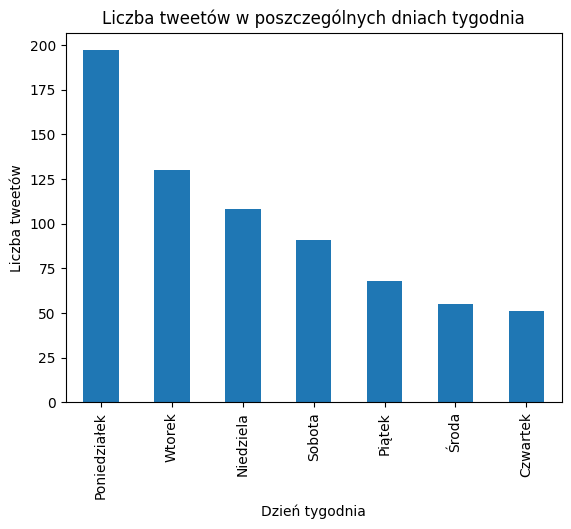

In [ ]:
plt.figure()
counts.plot(kind="bar")
plt.title("Liczba tweetów w poszczególnych dniach tygodnia")
plt.xlabel("Dzień tygodnia")
plt.ylabel("Liczba tweetów")
plt.show()